# Business Understanding
Based on the trending of AI nowadays, Stackoverflow survey for developer in 2023 has added some question about AI and how developer interact and react to this current trend. Therefore, the main focus is to uncover insights about the relation and insights of AI into developers in wide range of age and years of experience from this survey. We ask ourself the following questions:
1. How does the willingness to adopt AI change with programming experience?
2. What is the level of trust in AI benefits across different age groups?
3. What are the sentiments towards AI among various age groups?

# Data Understanding

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [25]:
#Check all columns name
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

# Prepare Data

## Handling missing values

In [26]:
def identify_categorical_columns(dataframe):
    """
    Identifies columns in the dataframe that contain categorical data (type 'object').
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe to analyze.

    Returns:
        pd.Index: Index containing the names of the categorical columns.
    """
    return dataframe.select_dtypes(include=['object']).columns

def calculate_missing_values(dataframe):
    """
    Calculates the percentage of missing values in each column of the dataframe.
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe to analyze.
    
    Returns:
        pd.Series: A series with column names as index and percentage of missing values as values.
    """
    return dataframe.isnull().mean() * 100

def summarize_categorical_data(dataframe, categorical_columns):
    """
    Creates a summary DataFrame for categorical variables including the percentage of missing values.
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe to analyze.
        categorical_columns (pd.Index): Categorical columns to summarize.

    Returns:
        pd.DataFrame: Summary DataFrame with columns for categorical names and their missing percentages.
    """
    missing_values = calculate_missing_values(dataframe)
    summary = pd.DataFrame({
        'column_name': categorical_columns,
        'missing_percentage': missing_values[categorical_columns]
    })
    summary = summary.reset_index(drop=True)
    return summary.sort_values(by='missing_percentage', ascending=False)

def drop_high_missing_data(dataframe, summary, threshold=70):
    """
    Drops columns from the dataframe where the percentage of missing values exceeds the specified threshold.
    
    Parameters:
        dataframe (pd.DataFrame): The original dataframe from which columns are to be dropped.
        summary (pd.DataFrame): DataFrame containing the summary of missing values for columns.
        threshold (float): Threshold percentage of missing values above which columns are dropped.

    Returns:
        pd.DataFrame: The dataframe with specified columns dropped.
    """
    columns_to_drop = summary[summary['missing_percentage'] > threshold]['column_name']
    return dataframe.drop(columns=columns_to_drop)

def impute_missing_values(dataframe, columns_to_impute):
    """
    Imputes missing values in specified columns with the most common value (mode).
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe where imputations will be performed.
        columns_to_impute (list): List of column names for which missing values will be imputed.

    Returns:
        pd.DataFrame: The dataframe with missing values imputed.
    """
    for col in columns_to_impute:
        mode_value = dataframe[col].mode()[0]
        dataframe[col].fillna(mode_value, inplace=True)
    return dataframe

# Main analysis pipeline
def clean_categorical_data(dataframe):
    """
    Pipeline function for cleaning categorical data in the dataframe.
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe to clean.
    
    Returns:
        pd.DataFrame: Cleaned dataframe with imputations and removal of high-missing-value columns.
    """
    categorical_columns = identify_categorical_columns(dataframe)
    categorical_summary = summarize_categorical_data(dataframe, categorical_columns)
    dataframe = drop_high_missing_data(dataframe, categorical_summary)
    dataframe = impute_missing_values(dataframe, ['EdLevel', 'Country'])
    return dataframe

# Usage of the pipeline function
df_cleaned = clean_categorical_data(df)
missing_values_after = calculate_missing_values(df_cleaned[['EdLevel', 'Country']])

missing_values_after


EdLevel    0.0
Country    0.0
dtype: float64

# Evaluate the data to answer the business questions

## Exploring generational differences in the perception and adoption of AI

In [31]:
# Define some function to help for furhter analysis
def convert_to_numeric(dataframe, column_name):
    """
    Converts a column to numeric type, coercing errors to NaN, and then drops rows with NaN in specified columns.
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe to modify.
        column_name (str): The name of the column to convert to numeric.

    Returns:
        pd.DataFrame: The modified DataFrame with specified conversions and NaN rows dropped.
    """
    dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')
    dataframe[column_name] = dataframe[column_name].astype('int64')
    dataframe.dropna(subset=[column_name], inplace=True)
    return dataframe

def group_and_normalize(dataframe, group_columns, count_column, normalize=True):
    """
    Groups the data by specified columns and counts occurrences, then optionally normalizes the counts to show proportions.
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe to use.
        group_columns (list): List of column names to group by.
        count_column (str): The column to count occurrences of.
        normalize (bool): Whether to normalize the counts to proportions.

    Returns:
        pd.DataFrame: DataFrame of counts or proportions of occurrences grouped by specified columns.
    """
    grouped = dataframe.groupby(group_columns).size().unstack(fill_value=0)
    if normalize:
        grouped = 100 * grouped.divide(grouped.sum(axis=1), axis=0)
    return grouped

def plot_stacked_bar(data, title, xlabel, ylabel, ax, rotation=0, legend_loc="upper center", legend_bbox=(0.5, -0.08)):
    """
    Plots a stacked bar chart with the given data.
    
    Parameters:
        data (pd.DataFrame): Data to plot.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        ax (matplotlib.axes.Axes): The axes object to plot on.
        rotation (int): Rotation angle for x-tick labels.
        legend_loc (str): Location of the legend.
        legend_bbox (tuple): Bounding box for legend placement.

    Returns:
        None
    """
    data.plot(kind='bar', stacked=True, ax=ax, colormap='summer', edgecolor='black')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', rotation=rotation)
    
    ax.grid(False)
    ax.set_axisbelow(True)
    ax.set_facecolor('white')
    for spine in ax.spines.values():
        spine.set_visible(False)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=legend_loc, bbox_to_anchor=legend_bbox, ncol=len(labels), frameon=False)
    plt.tight_layout()

### Q1: How does the willingness to adopt AI change with programming experience?

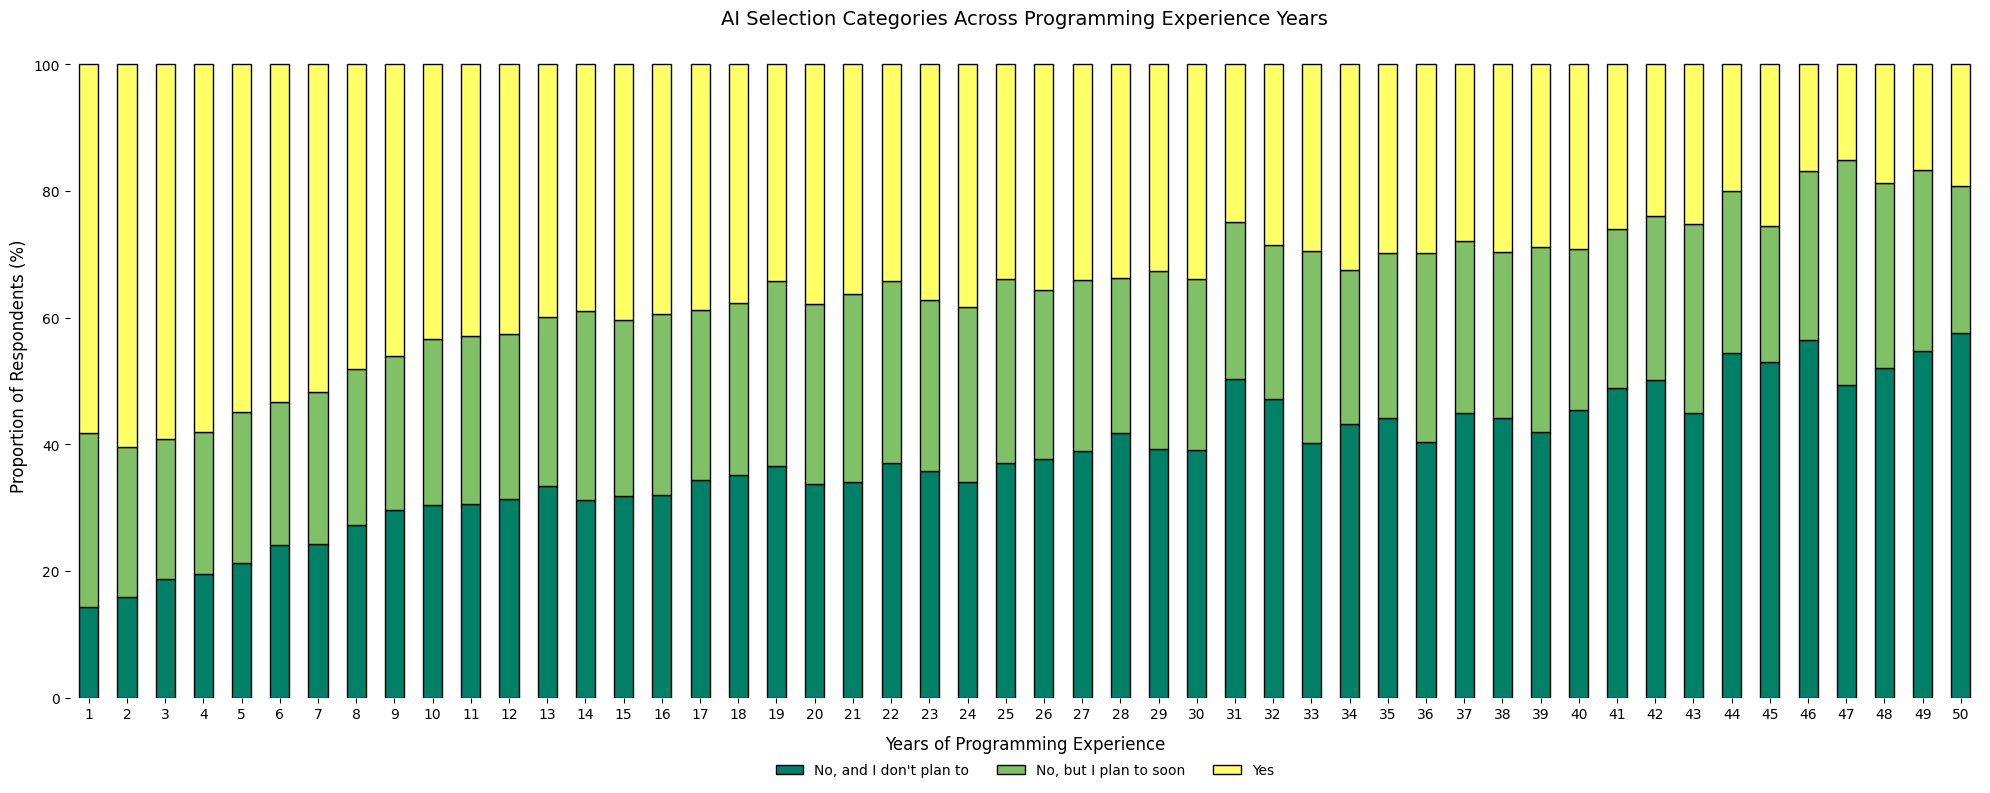

In [32]:
# Use the functions to process and plot data
df_cleaned = convert_to_numeric(df_cleaned, 'YearsCode')
grouped_prop = group_and_normalize(df_cleaned, ['YearsCode', 'AISelect'], 'YearsCode')

fig, ax = plt.subplots(figsize=(20, 8))
plot_stacked_bar(grouped_prop, 'AI Selection Categories Across Programming Experience Years',
                 'Years of Programming Experience', 'Proportion of Respondents (%)', ax,
                 rotation=0, legend_bbox=(0.5, -0.08))

plt.show()


Developers with fewer years of experience show more inclination towards adopting AI, suggesting a growing trend in AI integration among the newer generation of developers. It indicates that a majority of developers with varying years of experience have already engaged with AI ('Yes' category), showing a strong integration of AI in the field of software development. Interestingly, as the years of experience increase, a consistent pattern emerges: fewer developers plan to engage with AI ('No, but I plan to soon'), and more are certain they won’t ('No, and I don't plan to'). This could suggest that more seasoned developers are either already using AI or are set in their ways and less open to adopting it.

### Q2: What is the level of trust in AI benefits across different age groups?

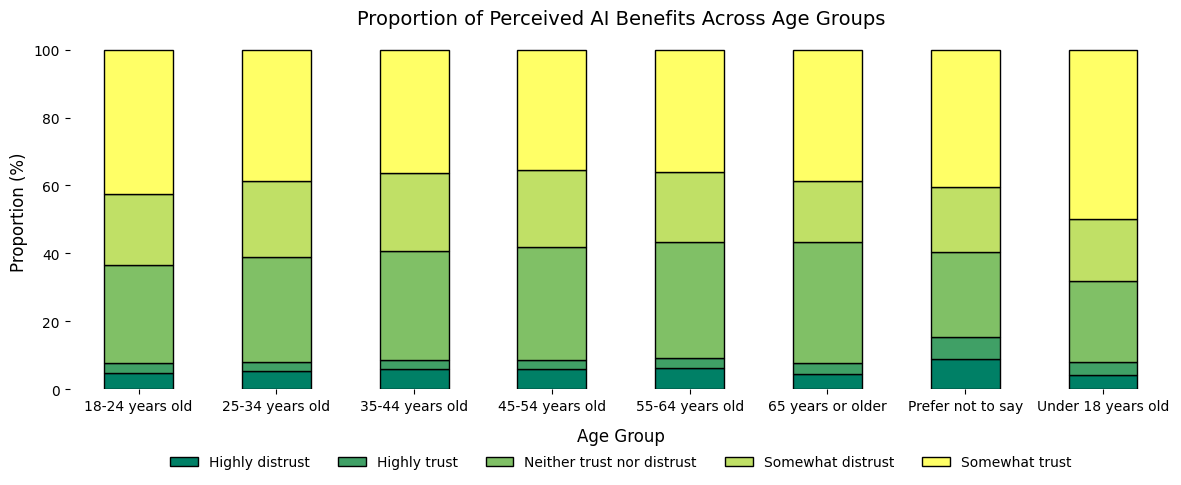

In [29]:
# Process and plot the second question
df_filtered = df_cleaned.dropna(subset=['Age', 'AIBen'])
age_ben_props = group_and_normalize(df_filtered, ['Age', 'AIBen'], 'Age')

fig, ax = plt.subplots(figsize=(12, 5))
plot_stacked_bar(age_ben_props, 'Proportion of Perceived AI Benefits Across Age Groups',
                 'Age Group', 'Proportion (%)', ax, rotation=0, legend_loc="upper center", legend_bbox=(0.5, -0.15))

plt.show()

 Younger developers display a higher level of trust in AI. In contrast, trust diminishes with age, indicating a potential generational divide in the perception of AI.
 The distribution of trust in AI's benefits across different age groups is depicted. Younger demographics (18-24 and 25-34 years old) show higher levels of trust ('Highly trust'), while older groups (55-64 and 65 or older) exhibit a greater degree of skepticism ('Neither trust nor distrust' and 'Somewhat distrust'). This might reflect generational differences in the adoption and acceptance of new technologies, with younger individuals being more optimistic about the potential of AI.

### Q3: What are the sentiments towards AI among various age groups?

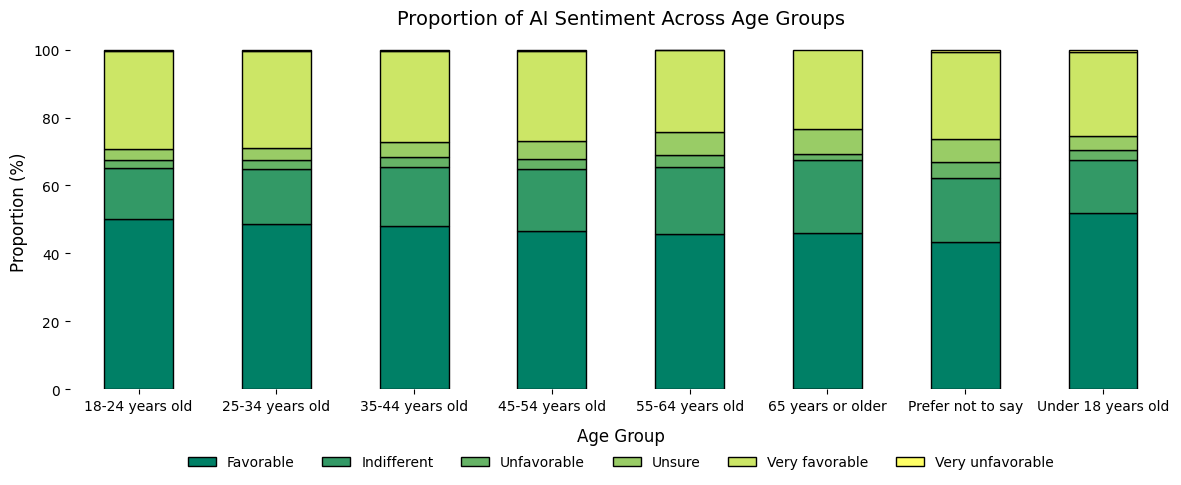

In [30]:
# Process and plot the third question
df_filtered_AISent = df_cleaned.dropna(subset=['Age', 'AISent'])
age_ben_props_AISent = group_and_normalize(df_filtered_AISent, ['Age', 'AISent'], 'Age')

fig, ax = plt.subplots(figsize=(12, 5))
plot_stacked_bar(age_ben_props_AISent, 'Proportion of AI Sentiment Across Age Groups',
                 'Age Group', 'Proportion (%)', ax, rotation=0, legend_loc="upper center", legend_bbox=(0.5, -0.15))

plt.show()

Further explores attitudes towards AI, this time focusing on sentiment. A pattern similar to the second chart emerges, with younger people (18-24 and 25-34 years old) having a more favorable or very favorable view of AI, while older groups show a mix of sentiments, with 'Unsure' and 'Indifferent' sentiments appearing more prominently. Sentiment analysis reflects a similar generational gap: more favorable views among younger individuals and a mix of uncertainty and indifference among older ones.